In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

In [ ]:
!pip install -U sentence-transformers

In [3]:
df = pd.read_csv('/kaggle/input/concatenate-twitter-data/main_df_users.csv')
df.head()

,timestamp,user,bio,tweettext
0,Mon Apr 15 19:36:44 +0000 2024,jc_talkz,NaN,“Being happy never goes out of style.”🇵🇹
1,Sat Apr 13 20:59:21 +0000 2024,Luna Lux Legacy,"Passionately seeking judicial reform, specific...",https://t.co/tziQasjVFq
2,Sat Apr 13 20:59:15 +0000 2024,Luna Lux Legacy,"Passionately seeking judicial reform, specific...",https://t.co/r8Ua5eW2Sg
3,Sat Apr 13 20:32:02 +0000 2024,Luna Lux Legacy,"Passionately seeking judicial reform, specific...",https://t.co/HepEBC7rU4
4,Sat Apr 13 20:25:37 +0000 2024,Luna Lux Legacy,"Passionately seeking judicial reform, specific...",https://t.co/iJH7M0KtgY


In [4]:
df = df.fillna('')

4 models:

minilm is small and fast
distilusebase is multilingual
mpnet is big with a lot of knowledge
jina is sota and latest

In [5]:
from sentence_transformers import SentenceTransformer
model1 = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', device = 'cuda') # small and fast
model2 = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2', device = 'cuda') # multilingual
model3 = SentenceTransformer('sentence-transformers/all-mpnet-base-v2', device = 'cuda') # large
model4 = SentenceTransformer('jinaai/jina-embeddings-v2-base-en', device = 'cuda') # SOTA

# model.to('cuda')

2024-06-11 21:44:42.143570: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 21:44:42.143677: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 21:44:42.269092: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/71.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/275M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at jinaai/jina-embeddings-v2-base-en and are newly initialized: ['embeddings.position_embeddings.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerNorm.weight', 'encoder.layer.0.output.dense.bias', 'encoder.layer.0.output.dense.weight', 'encoder.layer.1.intermediate.dense.bias', 'encoder.layer.1.intermediate.dense.weight', 'encoder.layer.1.output.LayerNorm.bias', 'encoder.layer.1.output.LayerNorm.weight', 'encoder.layer.1.output.dense.bias', 'encoder.layer.1.output.dense.weight', 'encoder.layer.10.intermediate.dense.bias', 'encoder.layer.10.intermediate.dense.weight', 'encoder.layer.10.output.LayerNorm.bias', 'encoder.layer.10.output.LayerNorm.weight', 'encoder.layer.10.output.dense.bias', 'encoder.layer.10.output.dense.weight', 'encoder.layer.11.intermediate.dense.bias', 'encoder.layer.11.intermedi

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

https://sbert.net/docs/sentence_transformer/pretrained_models.html

In [6]:

text = (df['bio']+df['tweettext']).tolist()

compute embeddings

In [ ]:
main_embeddings1 = model1.encode(text, device= 'cuda')
main_embeddings2 = model2.encode(text, device= 'cuda')
main_embeddings3 = model3.encode(text, device= 'cuda')
main_embeddings4 = model4.encode(text, device= 'cuda')

In [8]:
import numpy as np
np.save('minilml6v2.npy',main_embeddings1)
np.save('distiluse-base-multilingual.npy',main_embeddings2)
np.save('all-mpnet-base-v2.npy',main_embeddings3)
np.save('jina-v2-en.npy',main_embeddings4)

define all the decay functions

In [9]:
import numpy as np

def exponential_decay(timeline, embeddings, k):
    a = np.arange(1, len(timeline) + 1)
    decay = np.exp(-k * a)
    result = decay[:, np.newaxis] * embeddings
    return result

def inverse_linear_decay(timeline, embeddings, k):
    a = np.arange(1, len(timeline) + 1)
    decay = 1 / (1 + k * a)
    result = decay[:, np.newaxis] * embeddings
    return result

def inverse_square_root_decay(timeline, embeddings, k):
    a = np.arange(1, len(timeline) + 1)
    decay = 1 / np.sqrt(1 + k * a)
    result = decay[:, np.newaxis] * embeddings
    return result

def hyperbolic_decay(timeline, embeddings, k):
    a = np.arange(1, len(timeline) + 1)
    decay = 1 / (1 + k * a**2)
    result = decay[:, np.newaxis] * embeddings
    return result

def logarithmic_decay(timeline, embeddings, k):
    a = np.arange(1, len(timeline) + 1)
    decay = 1 / np.log(1 + k * a + 1)
    result = decay[:, np.newaxis] * embeddings
    return result

def gaussian_decay(timeline, embeddings, k):
    a = np.arange(1, len(timeline) + 1)
    decay = np.exp(-k * a**2)
    result = decay[:, np.newaxis] * embeddings
    return result



In [10]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def compute_cosine_similarity(embeddings):
    cos_sim = cosine_similarity(embeddings)
    # Extract cosine similarities for consecutive pairs
    cos_sim_pairs = np.diag(cos_sim, k=1)
    return cos_sim_pairs

def exponential_decay_with_cosine(timeline, embeddings, k):
    a = np.arange(1, len(timeline))
    cos_sim = compute_cosine_similarity(embeddings)
    decay = np.exp(-k * a / cos_sim)
    result = decay[:, np.newaxis] * embeddings[1:]
    return result

def inverse_linear_decay_with_cosine(timeline, embeddings, k):
    a = np.arange(1, len(timeline))
    cos_sim = compute_cosine_similarity(embeddings)
    decay = 1 / (1 + k * a / cos_sim)
    result = decay[:, np.newaxis] * embeddings[1:]
    return result

def inverse_square_root_decay_with_cosine(timeline, embeddings, k):
    a = np.arange(1, len(timeline))
    cos_sim = compute_cosine_similarity(embeddings)
    decay = 1 / np.sqrt(1 + k * a / cos_sim)
    result = decay[:, np.newaxis] * embeddings[1:]
    return result

def hyperbolic_decay_with_cosine(timeline, embeddings, k):
    a = np.arange(1, len(timeline))
    cos_sim = compute_cosine_similarity(embeddings)
    decay = 1 / (1 + (k * a**2) / cos_sim)
    result = decay[:, np.newaxis] * embeddings[1:]
    return result

def logarithmic_decay_with_cosine(timeline, embeddings, k):
    a = np.arange(1, len(timeline))
    cos_sim = compute_cosine_similarity(embeddings)
    decay = 1 / np.log(1 + (k * a / cos_sim) + 1)
    result = decay[:, np.newaxis] * embeddings[1:]
    return result

def gaussian_decay_with_cosine(timeline, embeddings, k):
    a = np.arange(1, len(timeline))
    cos_sim = compute_cosine_similarity(embeddings)
    decay = np.exp(-(k * a**2) / cos_sim)
    result = decay[:, np.newaxis] * embeddings[1:]
    return result


In [11]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def compute_cosine_similarity(embeddings):
    cos_sim = cosine_similarity(embeddings)
    cos_sim_pairs = np.diag(cos_sim, k=1)
    return cos_sim_pairs

def compute_time_differences(timeline):
    delta_t = np.diff(timeline)
    delta_t = np.array([dt.total_seconds() for dt in delta_t])  # convert to seconds if using datetime objects
    return delta_t

def exponential_decay_with_cosine_and_time(timeline, embeddings, k):
    delta_t = compute_time_differences(timeline)
    cos_sim = compute_cosine_similarity(embeddings)
    a = np.arange(1, len(timeline))
    decay = np.exp(-k * a * delta_t / cos_sim)
    result = decay[:, np.newaxis] * embeddings[1:]
    return result

def inverse_linear_decay_with_cosine_and_time(timeline, embeddings, k):
    delta_t = compute_time_differences(timeline)
    cos_sim = compute_cosine_similarity(embeddings)
    a = np.arange(1, len(timeline))
    decay = 1 / (1 + k * a * delta_t / cos_sim)
    result = decay[:, np.newaxis] * embeddings[1:]
    return result

def inverse_square_root_decay_with_cosine_and_time(timeline, embeddings, k):
    delta_t = compute_time_differences(timeline)
    cos_sim = compute_cosine_similarity(embeddings)
    a = np.arange(1, len(timeline))
    decay = 1 / np.sqrt(1 + k * a * delta_t / cos_sim)
    result = decay[:, np.newaxis] * embeddings[1:]
    return result

def hyperbolic_decay_with_cosine_and_time(timeline, embeddings, k):
    delta_t = compute_time_differences(timeline)
    cos_sim = compute_cosine_similarity(embeddings)
    a = np.arange(1, len(timeline))
    decay = 1 / (1 + (k * a**2 * delta_t / cos_sim))
    result = decay[:, np.newaxis] * embeddings[1:]
    return result

def logarithmic_decay_with_cosine_and_time(timeline, embeddings, k):
    delta_t = compute_time_differences(timeline)
    cos_sim = compute_cosine_similarity(embeddings)
    a = np.arange(1, len(timeline))
    decay = 1 / np.log(1 + (k * a * delta_t / cos_sim) + 1)
    result = decay[:, np.newaxis] * embeddings[1:]
    return result

def gaussian_decay_with_cosine_and_time(timeline, embeddings, k):
    delta_t = compute_time_differences(timeline)
    cos_sim = compute_cosine_similarity(embeddings)
    a = np.arange(1, len(timeline))
    decay = np.exp(-(k * a**2 * delta_t / cos_sim))
    result = decay[:, np.newaxis] * embeddings[1:]
    return result


In [13]:
import warnings
warnings.filterwarnings("ignore")

# minilm diversity analysis

In [14]:
exp_dpe = []
inv_lin_dpe = []
inv_sqrt_dpe = []
hyperbolic_dpe = []
logarithmic_dpe = []
gaussian_dpe = []

exp_cos_dpe = []
inv_lin_cos_dpe = []
inv_sqrt_cos_dpe = []
hyperbolic_cos_dpe = []
logarithmic_cos_dpe = []
gaussian_cos_dpe = []

exp_cos_time_dpe = []
inv_lin_cos_time_dpe = []
inv_sqrt_cos_time_dpe = []
hyperbolic_cos_time_dpe = []
logarithmic_cos_time_dpe = []
gaussian_cos_time_dpe = []

for i in tqdm(df['user'].unique()):
    udf = df[df['user'] == i].reset_index(drop=True)
    timestamp = pd.to_datetime(udf['timestamp'], format='%a %b %d %H:%M:%S %z %Y').tolist()
#     embs = model.encode(text, show_progress_bar=False)
    embs = main_embeddings1[df[df['user']==i].index]
    
    exp_dpe.append(exponential_decay(timestamp, embs, k=0.05))
    inv_lin_dpe.append(inverse_linear_decay(timestamp, embs, k=0.05))
    inv_sqrt_dpe.append(inverse_square_root_decay(timestamp, embs, k=0.05))
    hyperbolic_dpe.append(hyperbolic_decay(timestamp, embs, k=0.05))
    logarithmic_dpe.append(logarithmic_decay(timestamp, embs, k=0.05))
    gaussian_dpe.append(gaussian_decay(timestamp, embs, k=0.05))
    
    exp_cos_dpe.append(exponential_decay_with_cosine(timestamp, embs, k=0.05))
    inv_lin_cos_dpe.append(inverse_linear_decay_with_cosine(timestamp, embs, k=0.05))
    inv_sqrt_cos_dpe.append(inverse_square_root_decay_with_cosine(timestamp, embs, k=0.05))
    hyperbolic_cos_dpe.append(hyperbolic_decay_with_cosine(timestamp, embs, k=0.05))
    logarithmic_cos_dpe.append(logarithmic_decay_with_cosine(timestamp, embs, k=0.05))
    gaussian_cos_dpe.append(gaussian_decay_with_cosine(timestamp, embs, k=0.05))
    
    exp_cos_time_dpe.append(exponential_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    inv_lin_cos_time_dpe.append(inverse_linear_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    inv_sqrt_cos_time_dpe.append(inverse_square_root_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    hyperbolic_cos_time_dpe.append(hyperbolic_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    logarithmic_cos_time_dpe.append(logarithmic_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    gaussian_cos_time_dpe.append(gaussian_decay_with_cosine_and_time(timestamp, embs, k=0.05))

  0%|          | 0/406 [00:00<?, ?it/s]

In [15]:
exp_dpe[0].sum(axis =0).shape

(384,)

In [16]:
def sum_and_save(array_list, filename,k = 1):
    summed_array = np.array([i.sum(axis =0) for i in array_list])
    np.save(str(k)+"_"+filename, summed_array)

# Example usage for each list

# Without cosine similarity and time
sum_and_save(exp_dpe, 'exp_dpe.npy')
sum_and_save(inv_lin_dpe, 'inv_lin_dpe.npy')
sum_and_save(inv_sqrt_dpe, 'inv_sqrt_dpe.npy')
sum_and_save(hyperbolic_dpe, 'hyperbolic_dpe.npy')
sum_and_save(logarithmic_dpe, 'logarithmic_dpe.npy')
sum_and_save(gaussian_dpe, 'gaussian_dpe.npy')

# With cosine similarity
sum_and_save(exp_cos_dpe, 'exp_cos_dpe.npy')
sum_and_save(inv_lin_cos_dpe, 'inv_lin_cos_dpe.npy')
sum_and_save(inv_sqrt_cos_dpe, 'inv_sqrt_cos_dpe.npy')
sum_and_save(hyperbolic_cos_dpe, 'hyperbolic_cos_dpe.npy')
sum_and_save(logarithmic_cos_dpe, 'logarithmic_cos_dpe.npy')
sum_and_save(gaussian_cos_dpe, 'gaussian_cos_dpe.npy')

# With cosine similarity and time
sum_and_save(exp_cos_time_dpe, 'exp_cos_time_dpe.npy')
sum_and_save(inv_lin_cos_time_dpe, 'inv_lin_cos_time_dpe.npy')
sum_and_save(inv_sqrt_cos_time_dpe, 'inv_sqrt_cos_time_dpe.npy')
sum_and_save(hyperbolic_cos_time_dpe, 'hyperbolic_cos_time_dpe.npy')
sum_and_save(logarithmic_cos_time_dpe, 'logarithmic_cos_time_dpe.npy')
sum_and_save(gaussian_cos_time_dpe, 'gaussian_cos_time_dpe.npy')

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
def calculate_diversity(embeddings):
    summed_array = np.nan_to_num(np.array([i.sum(axis =0) for i in  embeddings]), 0)
    return 1-sum(sum(cosine_similarity(summed_array)))/(summed_array.shape[0]**2)


In [24]:
basic_values = [
    calculate_diversity(exp_dpe),
    calculate_diversity(inv_lin_dpe),
    calculate_diversity(inv_sqrt_dpe),
    calculate_diversity(hyperbolic_dpe),
    calculate_diversity(logarithmic_dpe),
    calculate_diversity(gaussian_dpe)
]

cos_values = [
    calculate_diversity(exp_cos_dpe),
    calculate_diversity(inv_lin_cos_dpe),
    calculate_diversity(inv_sqrt_cos_dpe),
    calculate_diversity(hyperbolic_cos_dpe),
    calculate_diversity(logarithmic_cos_dpe),
    calculate_diversity(gaussian_cos_dpe)
]

cos_time_values = [
    calculate_diversity(exp_cos_time_dpe),
    calculate_diversity(inv_lin_cos_time_dpe),
    calculate_diversity(inv_sqrt_cos_time_dpe),
    calculate_diversity(hyperbolic_cos_time_dpe),
    calculate_diversity(logarithmic_cos_time_dpe),
    calculate_diversity(gaussian_cos_time_dpe)
]

# Create a DataFrame
diversity_df_1 = pd.DataFrame({
    "basic": basic_values,
    "cos": cos_values,
    "cos_time": cos_time_values
}, index=["exp", "inv_lin", "inv_sqrt", "hyperbolic", "logarithmic", "gaussian"])


In [27]:
diversity_df_1

,basic,cos,cos_time
exp,0.714106,0.841320,0.999453
inv_lin,0.712126,0.802726,0.899301
inv_sqrt,0.712055,0.843743,0.999913
hyperbolic,0.723307,0.817497,0.924208
logarithmic,0.712133,0.843750,0.999924
gaussian,0.741066,0.865656,0.999503


<Axes: >

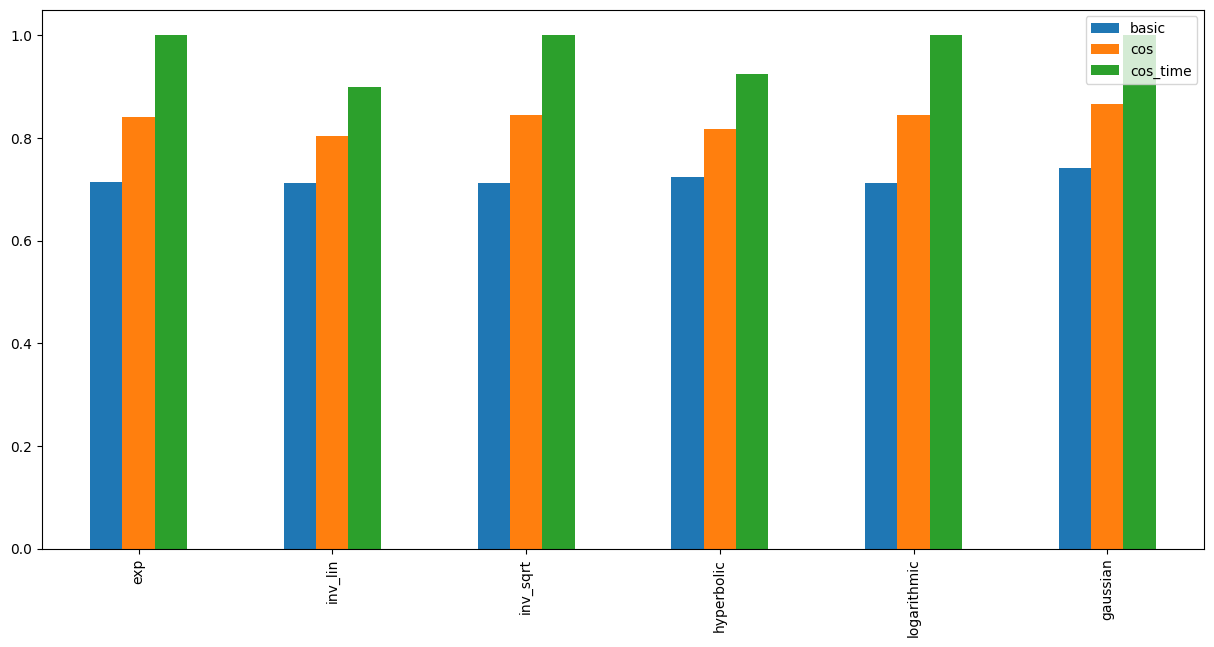

In [34]:
diversity_df_1.plot(kind = 'bar', figsize = (15,7))

# distilusecase multilingual diversity analysis

In [35]:
exp_dpe = []
inv_lin_dpe = []
inv_sqrt_dpe = []
hyperbolic_dpe = []
logarithmic_dpe = []
gaussian_dpe = []

exp_cos_dpe = []
inv_lin_cos_dpe = []
inv_sqrt_cos_dpe = []
hyperbolic_cos_dpe = []
logarithmic_cos_dpe = []
gaussian_cos_dpe = []

exp_cos_time_dpe = []
inv_lin_cos_time_dpe = []
inv_sqrt_cos_time_dpe = []
hyperbolic_cos_time_dpe = []
logarithmic_cos_time_dpe = []
gaussian_cos_time_dpe = []

for i in tqdm(df['user'].unique()):
    udf = df[df['user'] == i].reset_index(drop=True)
    timestamp = pd.to_datetime(udf['timestamp'], format='%a %b %d %H:%M:%S %z %Y').tolist()
#     embs = model.encode(text, show_progress_bar=False)
    embs = main_embeddings2[df[df['user']==i].index]
    
    exp_dpe.append(exponential_decay(timestamp, embs, k=0.05))
    inv_lin_dpe.append(inverse_linear_decay(timestamp, embs, k=0.05))
    inv_sqrt_dpe.append(inverse_square_root_decay(timestamp, embs, k=0.05))
    hyperbolic_dpe.append(hyperbolic_decay(timestamp, embs, k=0.05))
    logarithmic_dpe.append(logarithmic_decay(timestamp, embs, k=0.05))
    gaussian_dpe.append(gaussian_decay(timestamp, embs, k=0.05))
    
    exp_cos_dpe.append(exponential_decay_with_cosine(timestamp, embs, k=0.05))
    inv_lin_cos_dpe.append(inverse_linear_decay_with_cosine(timestamp, embs, k=0.05))
    inv_sqrt_cos_dpe.append(inverse_square_root_decay_with_cosine(timestamp, embs, k=0.05))
    hyperbolic_cos_dpe.append(hyperbolic_decay_with_cosine(timestamp, embs, k=0.05))
    logarithmic_cos_dpe.append(logarithmic_decay_with_cosine(timestamp, embs, k=0.05))
    gaussian_cos_dpe.append(gaussian_decay_with_cosine(timestamp, embs, k=0.05))
    
    exp_cos_time_dpe.append(exponential_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    inv_lin_cos_time_dpe.append(inverse_linear_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    inv_sqrt_cos_time_dpe.append(inverse_square_root_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    hyperbolic_cos_time_dpe.append(hyperbolic_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    logarithmic_cos_time_dpe.append(logarithmic_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    gaussian_cos_time_dpe.append(gaussian_decay_with_cosine_and_time(timestamp, embs, k=0.05))

  0%|          | 0/406 [00:00<?, ?it/s]

In [36]:
def sum_and_save(array_list, filename,k = 2):
    summed_array = np.array([i.sum(axis =0) for i in array_list])
    np.save(str(k)+"_"+filename, summed_array)

# Example usage for each list

# Without cosine similarity and time
sum_and_save(exp_dpe, 'exp_dpe.npy')
sum_and_save(inv_lin_dpe, 'inv_lin_dpe.npy')
sum_and_save(inv_sqrt_dpe, 'inv_sqrt_dpe.npy')
sum_and_save(hyperbolic_dpe, 'hyperbolic_dpe.npy')
sum_and_save(logarithmic_dpe, 'logarithmic_dpe.npy')
sum_and_save(gaussian_dpe, 'gaussian_dpe.npy')

# With cosine similarity
sum_and_save(exp_cos_dpe, 'exp_cos_dpe.npy')
sum_and_save(inv_lin_cos_dpe, 'inv_lin_cos_dpe.npy')
sum_and_save(inv_sqrt_cos_dpe, 'inv_sqrt_cos_dpe.npy')
sum_and_save(hyperbolic_cos_dpe, 'hyperbolic_cos_dpe.npy')
sum_and_save(logarithmic_cos_dpe, 'logarithmic_cos_dpe.npy')
sum_and_save(gaussian_cos_dpe, 'gaussian_cos_dpe.npy')

# With cosine similarity and time
sum_and_save(exp_cos_time_dpe, 'exp_cos_time_dpe.npy')
sum_and_save(inv_lin_cos_time_dpe, 'inv_lin_cos_time_dpe.npy')
sum_and_save(inv_sqrt_cos_time_dpe, 'inv_sqrt_cos_time_dpe.npy')
sum_and_save(hyperbolic_cos_time_dpe, 'hyperbolic_cos_time_dpe.npy')
sum_and_save(logarithmic_cos_time_dpe, 'logarithmic_cos_time_dpe.npy')
sum_and_save(gaussian_cos_time_dpe, 'gaussian_cos_time_dpe.npy')

In [37]:
basic_values = [
    calculate_diversity(exp_dpe),
    calculate_diversity(inv_lin_dpe),
    calculate_diversity(inv_sqrt_dpe),
    calculate_diversity(hyperbolic_dpe),
    calculate_diversity(logarithmic_dpe),
    calculate_diversity(gaussian_dpe)
]

cos_values = [
    calculate_diversity(exp_cos_dpe),
    calculate_diversity(inv_lin_cos_dpe),
    calculate_diversity(inv_sqrt_cos_dpe),
    calculate_diversity(hyperbolic_cos_dpe),
    calculate_diversity(logarithmic_cos_dpe),
    calculate_diversity(gaussian_cos_dpe)
]

cos_time_values = [
    calculate_diversity(exp_cos_time_dpe),
    calculate_diversity(inv_lin_cos_time_dpe),
    calculate_diversity(inv_sqrt_cos_time_dpe),
    calculate_diversity(hyperbolic_cos_time_dpe),
    calculate_diversity(logarithmic_cos_time_dpe),
    calculate_diversity(gaussian_cos_time_dpe)
]

# Create a DataFrame
diversity_df_2 = pd.DataFrame({
    "basic": basic_values,
    "cos": cos_values,
    "cos_time": cos_time_values
}, index=["exp", "inv_lin", "inv_sqrt", "hyperbolic", "logarithmic", "gaussian"])


In [38]:
diversity_df_2

,basic,cos,cos_time
exp,0.659331,0.786642,0.999312
inv_lin,0.656294,0.754419,0.872100
inv_sqrt,0.655778,0.784945,0.999873
hyperbolic,0.669123,0.769464,0.906596
logarithmic,0.655746,0.784848,0.999912
gaussian,0.688700,0.814016,0.999348


<Axes: >

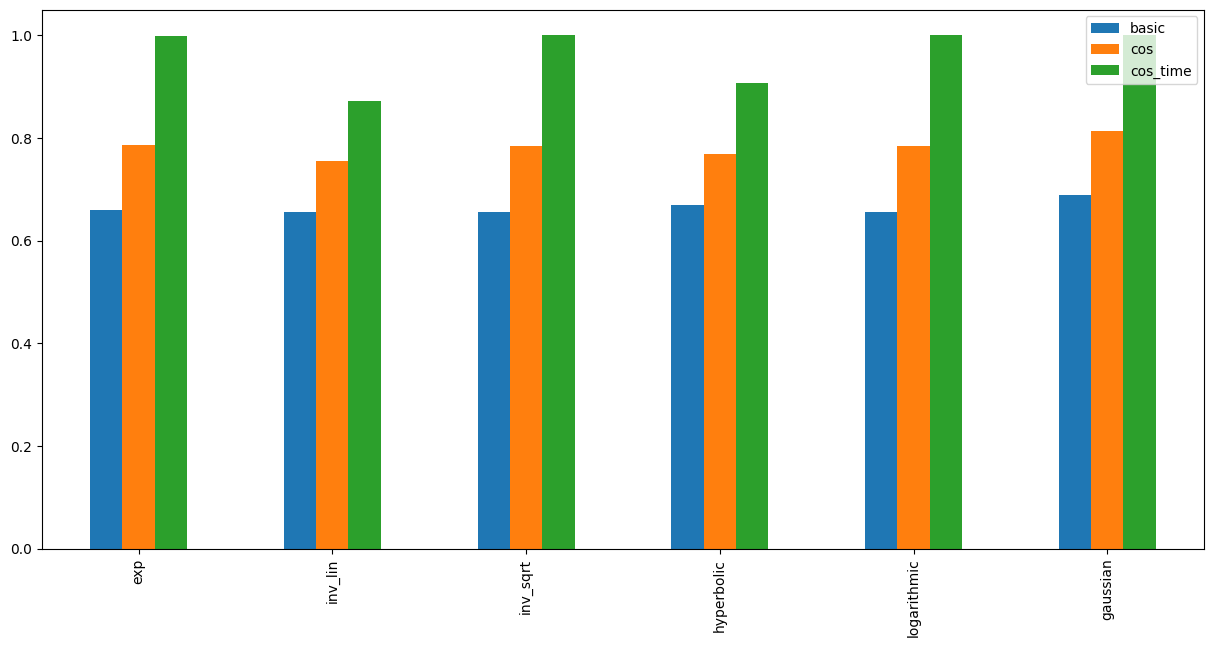

In [39]:
diversity_df_2.plot(kind = 'bar', figsize = (15,7))

# mpnet diversity analysis

In [40]:
exp_dpe = []
inv_lin_dpe = []
inv_sqrt_dpe = []
hyperbolic_dpe = []
logarithmic_dpe = []
gaussian_dpe = []

exp_cos_dpe = []
inv_lin_cos_dpe = []
inv_sqrt_cos_dpe = []
hyperbolic_cos_dpe = []
logarithmic_cos_dpe = []
gaussian_cos_dpe = []

exp_cos_time_dpe = []
inv_lin_cos_time_dpe = []
inv_sqrt_cos_time_dpe = []
hyperbolic_cos_time_dpe = []
logarithmic_cos_time_dpe = []
gaussian_cos_time_dpe = []

for i in tqdm(df['user'].unique()):
    udf = df[df['user'] == i].reset_index(drop=True)
    timestamp = pd.to_datetime(udf['timestamp'], format='%a %b %d %H:%M:%S %z %Y').tolist()
#     embs = model.encode(text, show_progress_bar=False)
    embs = main_embeddings3[df[df['user']==i].index]
    
    exp_dpe.append(exponential_decay(timestamp, embs, k=0.05))
    inv_lin_dpe.append(inverse_linear_decay(timestamp, embs, k=0.05))
    inv_sqrt_dpe.append(inverse_square_root_decay(timestamp, embs, k=0.05))
    hyperbolic_dpe.append(hyperbolic_decay(timestamp, embs, k=0.05))
    logarithmic_dpe.append(logarithmic_decay(timestamp, embs, k=0.05))
    gaussian_dpe.append(gaussian_decay(timestamp, embs, k=0.05))
    
    exp_cos_dpe.append(exponential_decay_with_cosine(timestamp, embs, k=0.05))
    inv_lin_cos_dpe.append(inverse_linear_decay_with_cosine(timestamp, embs, k=0.05))
    inv_sqrt_cos_dpe.append(inverse_square_root_decay_with_cosine(timestamp, embs, k=0.05))
    hyperbolic_cos_dpe.append(hyperbolic_decay_with_cosine(timestamp, embs, k=0.05))
    logarithmic_cos_dpe.append(logarithmic_decay_with_cosine(timestamp, embs, k=0.05))
    gaussian_cos_dpe.append(gaussian_decay_with_cosine(timestamp, embs, k=0.05))
    
    exp_cos_time_dpe.append(exponential_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    inv_lin_cos_time_dpe.append(inverse_linear_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    inv_sqrt_cos_time_dpe.append(inverse_square_root_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    hyperbolic_cos_time_dpe.append(hyperbolic_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    logarithmic_cos_time_dpe.append(logarithmic_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    gaussian_cos_time_dpe.append(gaussian_decay_with_cosine_and_time(timestamp, embs, k=0.05))

  0%|          | 0/406 [00:00<?, ?it/s]

In [41]:
def sum_and_save(array_list, filename,k = 3):
    summed_array = np.array([i.sum(axis =0) for i in array_list])
    np.save(str(k)+"_"+filename, summed_array)

# Example usage for each list

# Without cosine similarity and time
sum_and_save(exp_dpe, 'exp_dpe.npy')
sum_and_save(inv_lin_dpe, 'inv_lin_dpe.npy')
sum_and_save(inv_sqrt_dpe, 'inv_sqrt_dpe.npy')
sum_and_save(hyperbolic_dpe, 'hyperbolic_dpe.npy')
sum_and_save(logarithmic_dpe, 'logarithmic_dpe.npy')
sum_and_save(gaussian_dpe, 'gaussian_dpe.npy')

# With cosine similarity
sum_and_save(exp_cos_dpe, 'exp_cos_dpe.npy')
sum_and_save(inv_lin_cos_dpe, 'inv_lin_cos_dpe.npy')
sum_and_save(inv_sqrt_cos_dpe, 'inv_sqrt_cos_dpe.npy')
sum_and_save(hyperbolic_cos_dpe, 'hyperbolic_cos_dpe.npy')
sum_and_save(logarithmic_cos_dpe, 'logarithmic_cos_dpe.npy')
sum_and_save(gaussian_cos_dpe, 'gaussian_cos_dpe.npy')

# With cosine similarity and time
sum_and_save(exp_cos_time_dpe, 'exp_cos_time_dpe.npy')
sum_and_save(inv_lin_cos_time_dpe, 'inv_lin_cos_time_dpe.npy')
sum_and_save(inv_sqrt_cos_time_dpe, 'inv_sqrt_cos_time_dpe.npy')
sum_and_save(hyperbolic_cos_time_dpe, 'hyperbolic_cos_time_dpe.npy')
sum_and_save(logarithmic_cos_time_dpe, 'logarithmic_cos_time_dpe.npy')
sum_and_save(gaussian_cos_time_dpe, 'gaussian_cos_time_dpe.npy')

In [42]:
basic_values = [
    calculate_diversity(exp_dpe),
    calculate_diversity(inv_lin_dpe),
    calculate_diversity(inv_sqrt_dpe),
    calculate_diversity(hyperbolic_dpe),
    calculate_diversity(logarithmic_dpe),
    calculate_diversity(gaussian_dpe)
]

cos_values = [
    calculate_diversity(exp_cos_dpe),
    calculate_diversity(inv_lin_cos_dpe),
    calculate_diversity(inv_sqrt_cos_dpe),
    calculate_diversity(hyperbolic_cos_dpe),
    calculate_diversity(logarithmic_cos_dpe),
    calculate_diversity(gaussian_cos_dpe)
]

cos_time_values = [
    calculate_diversity(exp_cos_time_dpe),
    calculate_diversity(inv_lin_cos_time_dpe),
    calculate_diversity(inv_sqrt_cos_time_dpe),
    calculate_diversity(hyperbolic_cos_time_dpe),
    calculate_diversity(logarithmic_cos_time_dpe),
    calculate_diversity(gaussian_cos_time_dpe)
]

# Create a DataFrame
diversity_df_3 = pd.DataFrame({
    "basic": basic_values,
    "cos": cos_values,
    "cos_time": cos_time_values
}, index=["exp", "inv_lin", "inv_sqrt", "hyperbolic", "logarithmic", "gaussian"])


In [43]:
diversity_df_3

,basic,cos,cos_time
exp,0.698469,0.818740,0.999429
inv_lin,0.696391,0.790047,0.889009
inv_sqrt,0.696284,0.818990,0.999928
hyperbolic,0.707244,0.803467,0.920314
logarithmic,0.696314,0.818969,0.999927
gaussian,0.724950,0.843493,0.999477


<Axes: >

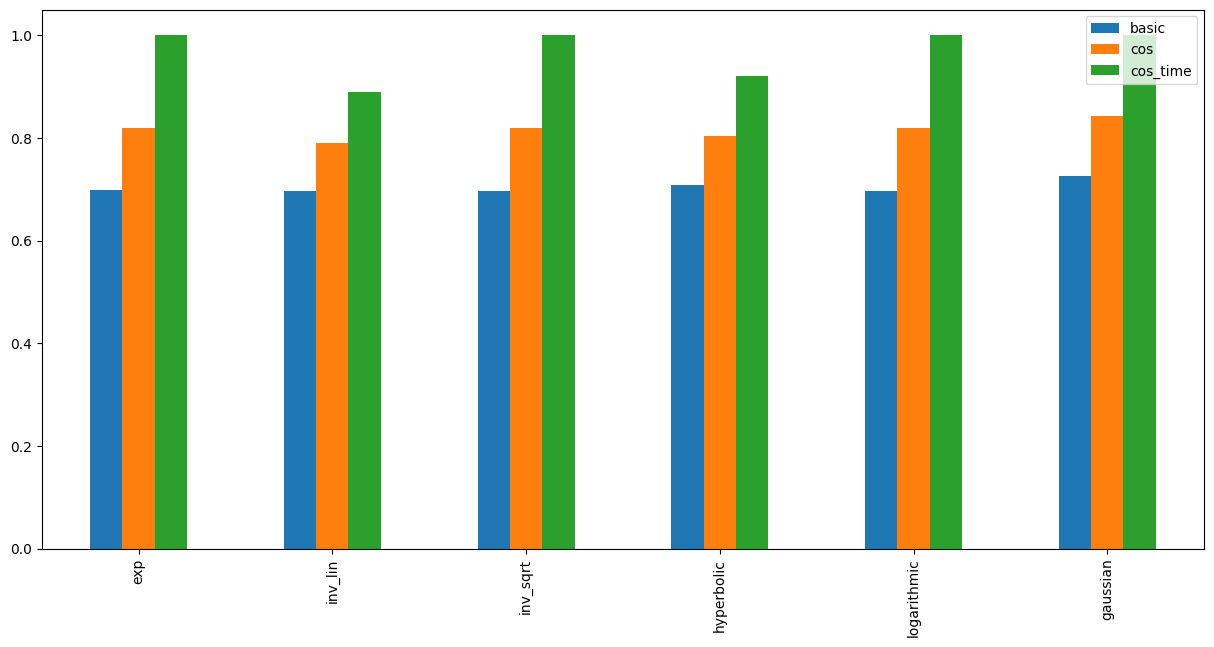

In [44]:
diversity_df_3.plot(kind = 'bar', figsize = (15,7))

# jina diversity analysis

In [45]:
exp_dpe = []
inv_lin_dpe = []
inv_sqrt_dpe = []
hyperbolic_dpe = []
logarithmic_dpe = []
gaussian_dpe = []

exp_cos_dpe = []
inv_lin_cos_dpe = []
inv_sqrt_cos_dpe = []
hyperbolic_cos_dpe = []
logarithmic_cos_dpe = []
gaussian_cos_dpe = []

exp_cos_time_dpe = []
inv_lin_cos_time_dpe = []
inv_sqrt_cos_time_dpe = []
hyperbolic_cos_time_dpe = []
logarithmic_cos_time_dpe = []
gaussian_cos_time_dpe = []

for i in tqdm(df['user'].unique()):
    udf = df[df['user'] == i].reset_index(drop=True)
    timestamp = pd.to_datetime(udf['timestamp'], format='%a %b %d %H:%M:%S %z %Y').tolist()
#     embs = model.encode(text, show_progress_bar=False)
    embs = main_embeddings4[df[df['user']==i].index]
    
    exp_dpe.append(exponential_decay(timestamp, embs, k=0.05))
    inv_lin_dpe.append(inverse_linear_decay(timestamp, embs, k=0.05))
    inv_sqrt_dpe.append(inverse_square_root_decay(timestamp, embs, k=0.05))
    hyperbolic_dpe.append(hyperbolic_decay(timestamp, embs, k=0.05))
    logarithmic_dpe.append(logarithmic_decay(timestamp, embs, k=0.05))
    gaussian_dpe.append(gaussian_decay(timestamp, embs, k=0.05))
    
    exp_cos_dpe.append(exponential_decay_with_cosine(timestamp, embs, k=0.05))
    inv_lin_cos_dpe.append(inverse_linear_decay_with_cosine(timestamp, embs, k=0.05))
    inv_sqrt_cos_dpe.append(inverse_square_root_decay_with_cosine(timestamp, embs, k=0.05))
    hyperbolic_cos_dpe.append(hyperbolic_decay_with_cosine(timestamp, embs, k=0.05))
    logarithmic_cos_dpe.append(logarithmic_decay_with_cosine(timestamp, embs, k=0.05))
    gaussian_cos_dpe.append(gaussian_decay_with_cosine(timestamp, embs, k=0.05))
    
    exp_cos_time_dpe.append(exponential_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    inv_lin_cos_time_dpe.append(inverse_linear_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    inv_sqrt_cos_time_dpe.append(inverse_square_root_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    hyperbolic_cos_time_dpe.append(hyperbolic_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    logarithmic_cos_time_dpe.append(logarithmic_decay_with_cosine_and_time(timestamp, embs, k=0.05))
    gaussian_cos_time_dpe.append(gaussian_decay_with_cosine_and_time(timestamp, embs, k=0.05))

  0%|          | 0/406 [00:00<?, ?it/s]

In [46]:
def sum_and_save(array_list, filename,k = 4):
    summed_array = np.array([i.sum(axis =0) for i in array_list])
    np.save(str(k)+"_"+filename, summed_array)

# Example usage for each list

# Without cosine similarity and time
sum_and_save(exp_dpe, 'exp_dpe.npy')
sum_and_save(inv_lin_dpe, 'inv_lin_dpe.npy')
sum_and_save(inv_sqrt_dpe, 'inv_sqrt_dpe.npy')
sum_and_save(hyperbolic_dpe, 'hyperbolic_dpe.npy')
sum_and_save(logarithmic_dpe, 'logarithmic_dpe.npy')
sum_and_save(gaussian_dpe, 'gaussian_dpe.npy')

# With cosine similarity
sum_and_save(exp_cos_dpe, 'exp_cos_dpe.npy')
sum_and_save(inv_lin_cos_dpe, 'inv_lin_cos_dpe.npy')
sum_and_save(inv_sqrt_cos_dpe, 'inv_sqrt_cos_dpe.npy')
sum_and_save(hyperbolic_cos_dpe, 'hyperbolic_cos_dpe.npy')
sum_and_save(logarithmic_cos_dpe, 'logarithmic_cos_dpe.npy')
sum_and_save(gaussian_cos_dpe, 'gaussian_cos_dpe.npy')

# With cosine similarity and time
sum_and_save(exp_cos_time_dpe, 'exp_cos_time_dpe.npy')
sum_and_save(inv_lin_cos_time_dpe, 'inv_lin_cos_time_dpe.npy')
sum_and_save(inv_sqrt_cos_time_dpe, 'inv_sqrt_cos_time_dpe.npy')
sum_and_save(hyperbolic_cos_time_dpe, 'hyperbolic_cos_time_dpe.npy')
sum_and_save(logarithmic_cos_time_dpe, 'logarithmic_cos_time_dpe.npy')
sum_and_save(gaussian_cos_time_dpe, 'gaussian_cos_time_dpe.npy')

In [47]:
basic_values = [
    calculate_diversity(exp_dpe),
    calculate_diversity(inv_lin_dpe),
    calculate_diversity(inv_sqrt_dpe),
    calculate_diversity(hyperbolic_dpe),
    calculate_diversity(logarithmic_dpe),
    calculate_diversity(gaussian_dpe)
]

cos_values = [
    calculate_diversity(exp_cos_dpe),
    calculate_diversity(inv_lin_cos_dpe),
    calculate_diversity(inv_sqrt_cos_dpe),
    calculate_diversity(hyperbolic_cos_dpe),
    calculate_diversity(logarithmic_cos_dpe),
    calculate_diversity(gaussian_cos_dpe)
]

cos_time_values = [
    calculate_diversity(exp_cos_time_dpe),
    calculate_diversity(inv_lin_cos_time_dpe),
    calculate_diversity(inv_sqrt_cos_time_dpe),
    calculate_diversity(hyperbolic_cos_time_dpe),
    calculate_diversity(logarithmic_cos_time_dpe),
    calculate_diversity(gaussian_cos_time_dpe)
]

# Create a DataFrame
diversity_df_4 = pd.DataFrame({
    "basic": basic_values,
    "cos": cos_values,
    "cos_time": cos_time_values
}, index=["exp", "inv_lin", "inv_sqrt", "hyperbolic", "logarithmic", "gaussian"])


In [50]:
print(diversity_df_4)

                basic       cos  cos_time
exp          0.386686  0.729275  0.999147
inv_lin      0.379295  0.568101  0.802421
inv_sqrt     0.378312  0.751743  0.999874
hyperbolic   0.412020  0.610245  0.856247
logarithmic  0.378366  0.750250  0.999897
gaussian     0.462135  0.794605  0.999150


<Axes: >

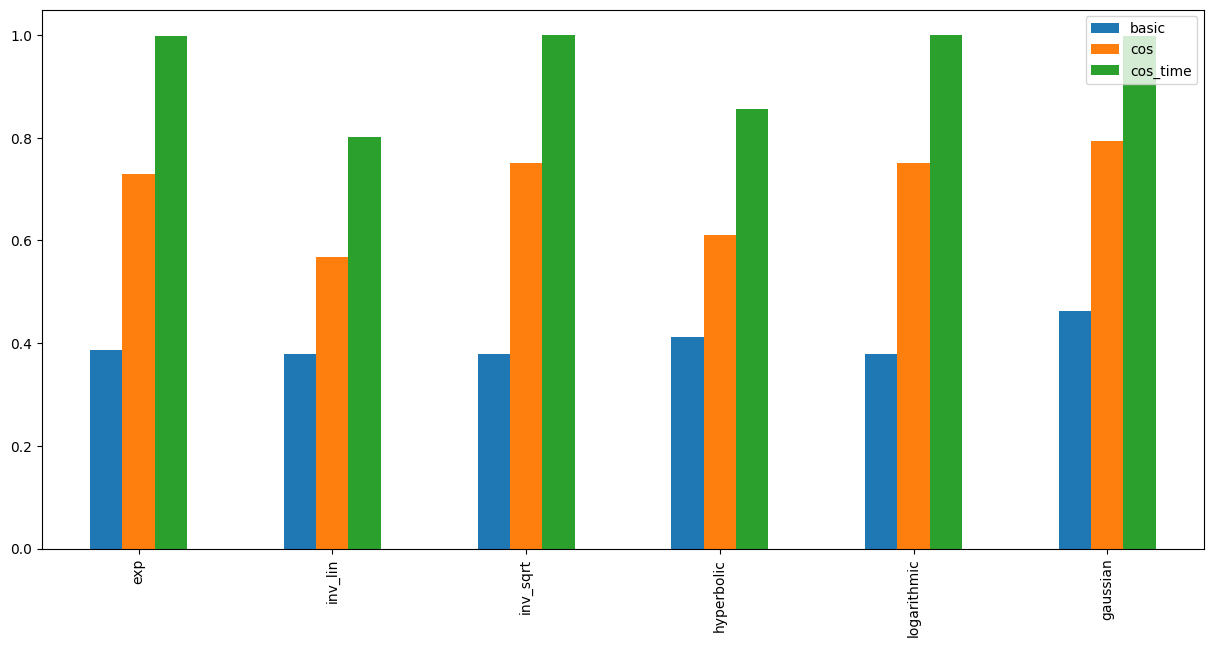

In [49]:
diversity_df_4.plot(kind = 'bar', figsize = (15,7))

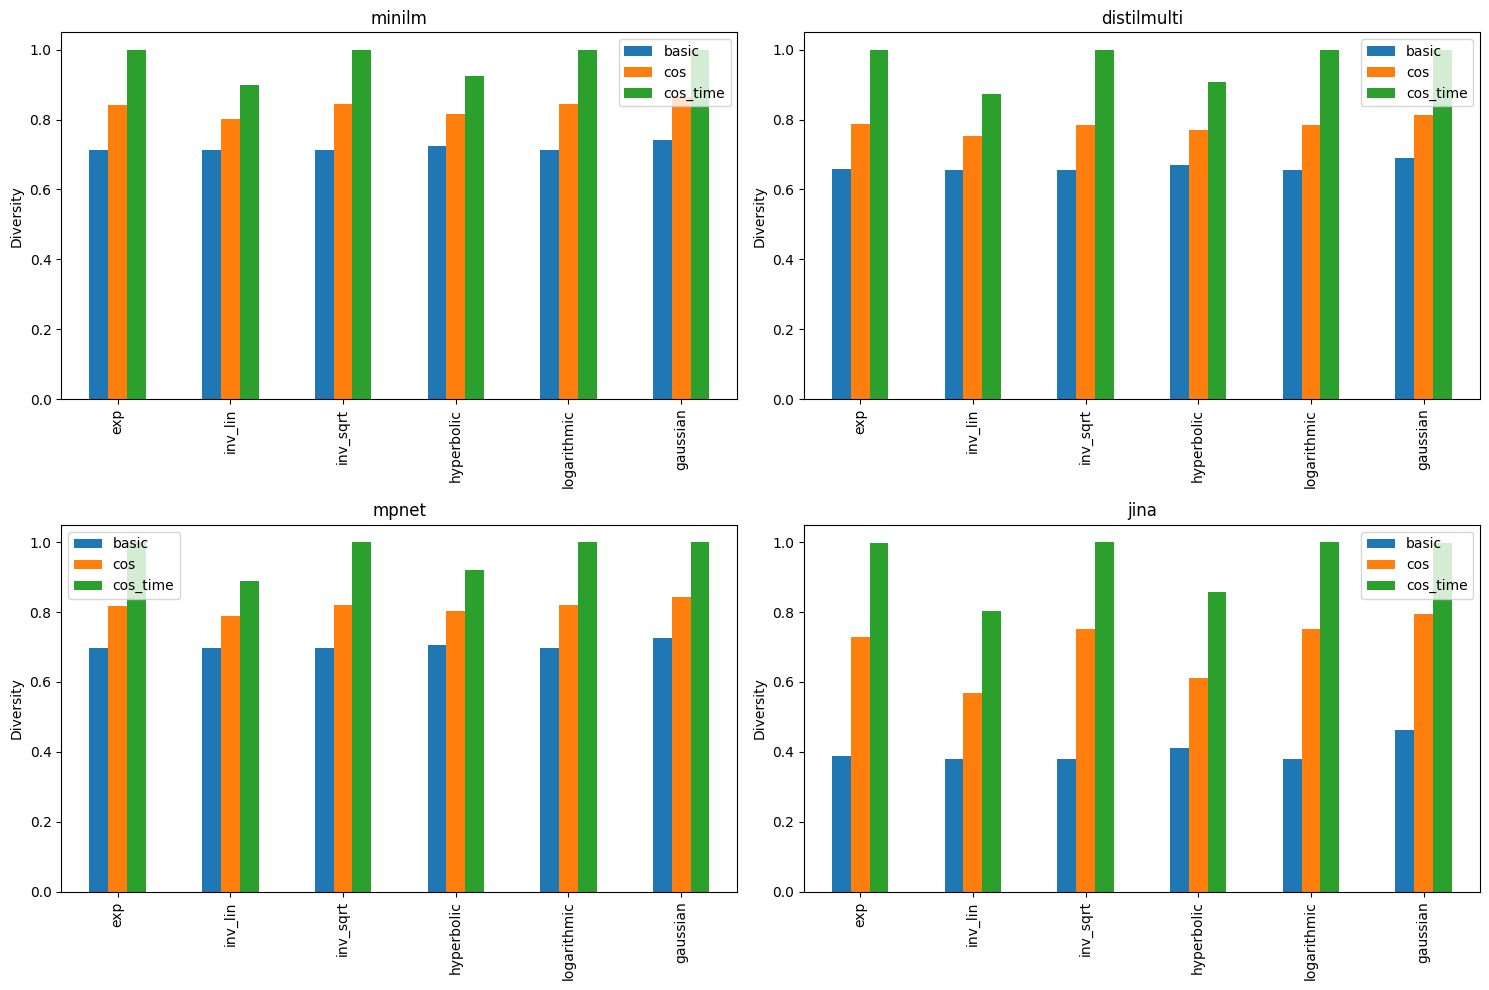

In [52]:
import matplotlib.pyplot as plt
dfs = [diversity_df_1, diversity_df_2, diversity_df_3, diversity_df_4]
labels = ["minilm", "distilmulti", "mpnet", "jina"]

# Create bar plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, df in enumerate(dfs):
    df.plot(kind='bar', ax=axs[i], title=labels[i])
    axs[i].set_ylabel('Diversity')

plt.tight_layout()
plt.show()

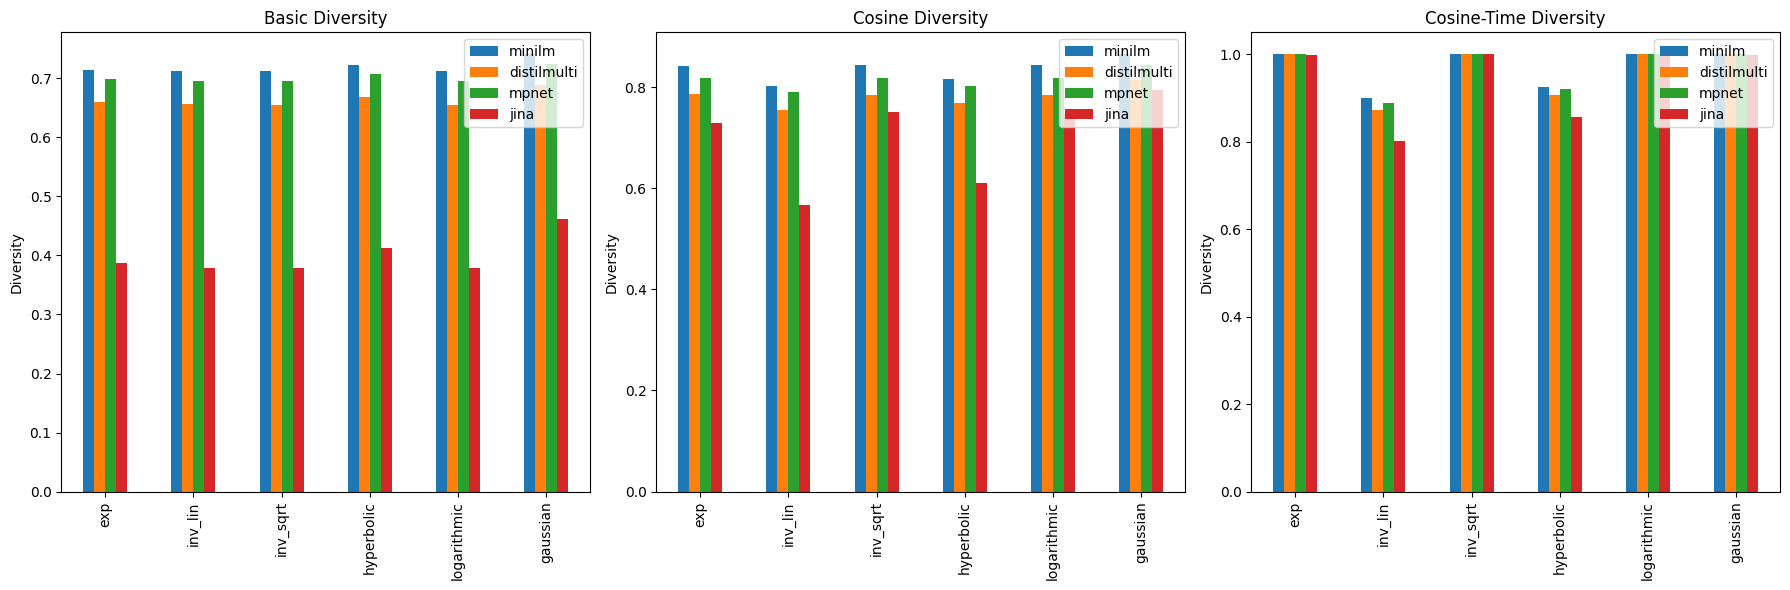

In [53]:
basic_df = pd.DataFrame({
    'minilm': diversity_df_1['basic'],
    'distilmulti': diversity_df_2['basic'],
    'mpnet': diversity_df_3['basic'],
    'jina': diversity_df_4['basic']
})

cos_df = pd.DataFrame({
    'minilm': diversity_df_1['cos'],
    'distilmulti': diversity_df_2['cos'],
    'mpnet': diversity_df_3['cos'],
    'jina': diversity_df_4['cos']
})

cos_time_df = pd.DataFrame({
    'minilm': diversity_df_1['cos_time'],
    'distilmulti': diversity_df_2['cos_time'],
    'mpnet': diversity_df_3['cos_time'],
    'jina': diversity_df_4['cos_time']
})

# Create bar plots for each metric
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

basic_df.plot(kind='bar', ax=axs[0], title='Basic Diversity')
axs[0].set_ylabel('Diversity')

cos_df.plot(kind='bar', ax=axs[1], title='Cosine Diversity')
axs[1].set_ylabel('Diversity')

cos_time_df.plot(kind='bar', ax=axs[2], title='Cosine-Time Diversity')
axs[2].set_ylabel('Diversity')

plt.tight_layout()
plt.show()

## Based on this we can clearly see that cosine - time decay is able to capture maximum diversity compared to basic and cosine diversities.
### gaussian>inv_sqrt>logarithmic>exponential>inv_lin 
#### diversity in Jina is low despite being sota is because it is tuned for RAG models, not for general embedding purposes. Its purpose is to encourage similarity, hence less diversity
#### mpnet and distiluse multilingual work the best with similar metrics

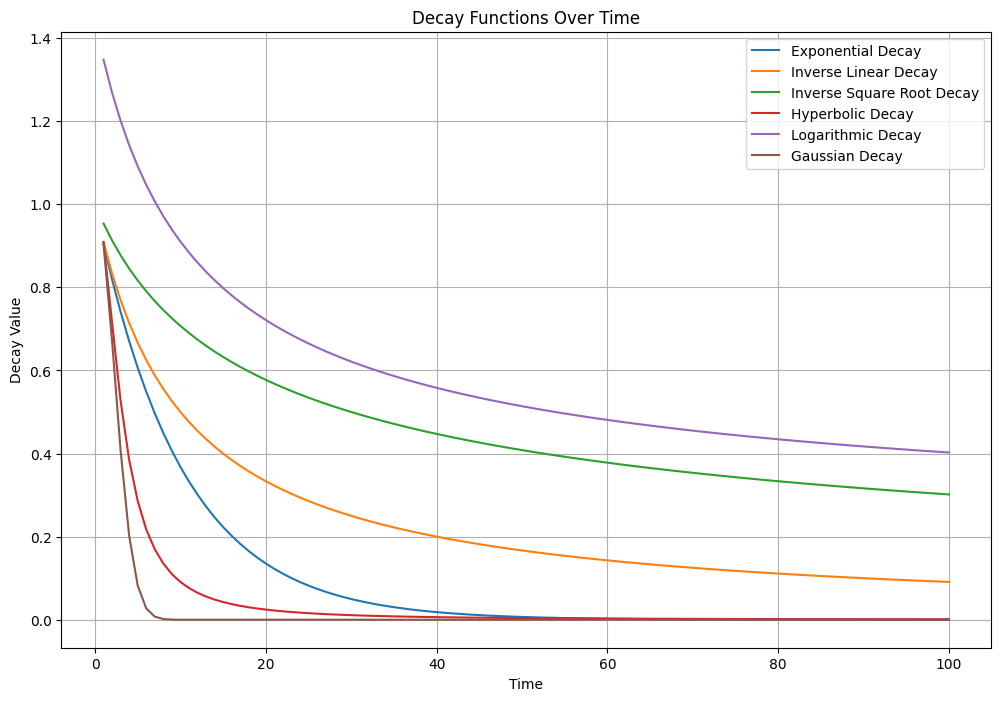

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Define the timeline and parameter k
timeline = np.arange(1, 101)  # Example timeline from 1 to 100
k = 0.1  # Example decay parameter

# Calculate decay values using the given functions
exp_decay = np.exp(-k * timeline)
inv_lin_decay = 1 / (1 + k * timeline)
inv_sqrt_decay = 1 / np.sqrt(1 + k * timeline)
hyperbolic_decay = 1 / (1 + k * timeline**2)
logarithmic_decay = 1 / np.log(1 + k * timeline + 1)
gaussian_decay = np.exp(-k * timeline**2)

# Plot the decay functions
plt.figure(figsize=(12, 8))

plt.plot(timeline, exp_decay, label='Exponential Decay')
plt.plot(timeline, inv_lin_decay, label='Inverse Linear Decay')
plt.plot(timeline, inv_sqrt_decay, label='Inverse Square Root Decay')
plt.plot(timeline, hyperbolic_decay, label='Hyperbolic Decay')
plt.plot(timeline, logarithmic_decay, label='Logarithmic Decay')
plt.plot(timeline, gaussian_decay, label='Gaussian Decay')

plt.xlabel('Time')
plt.ylabel('Decay Value')
plt.title('Decay Functions Over Time')
plt.legend()
plt.grid(True)
plt.show()


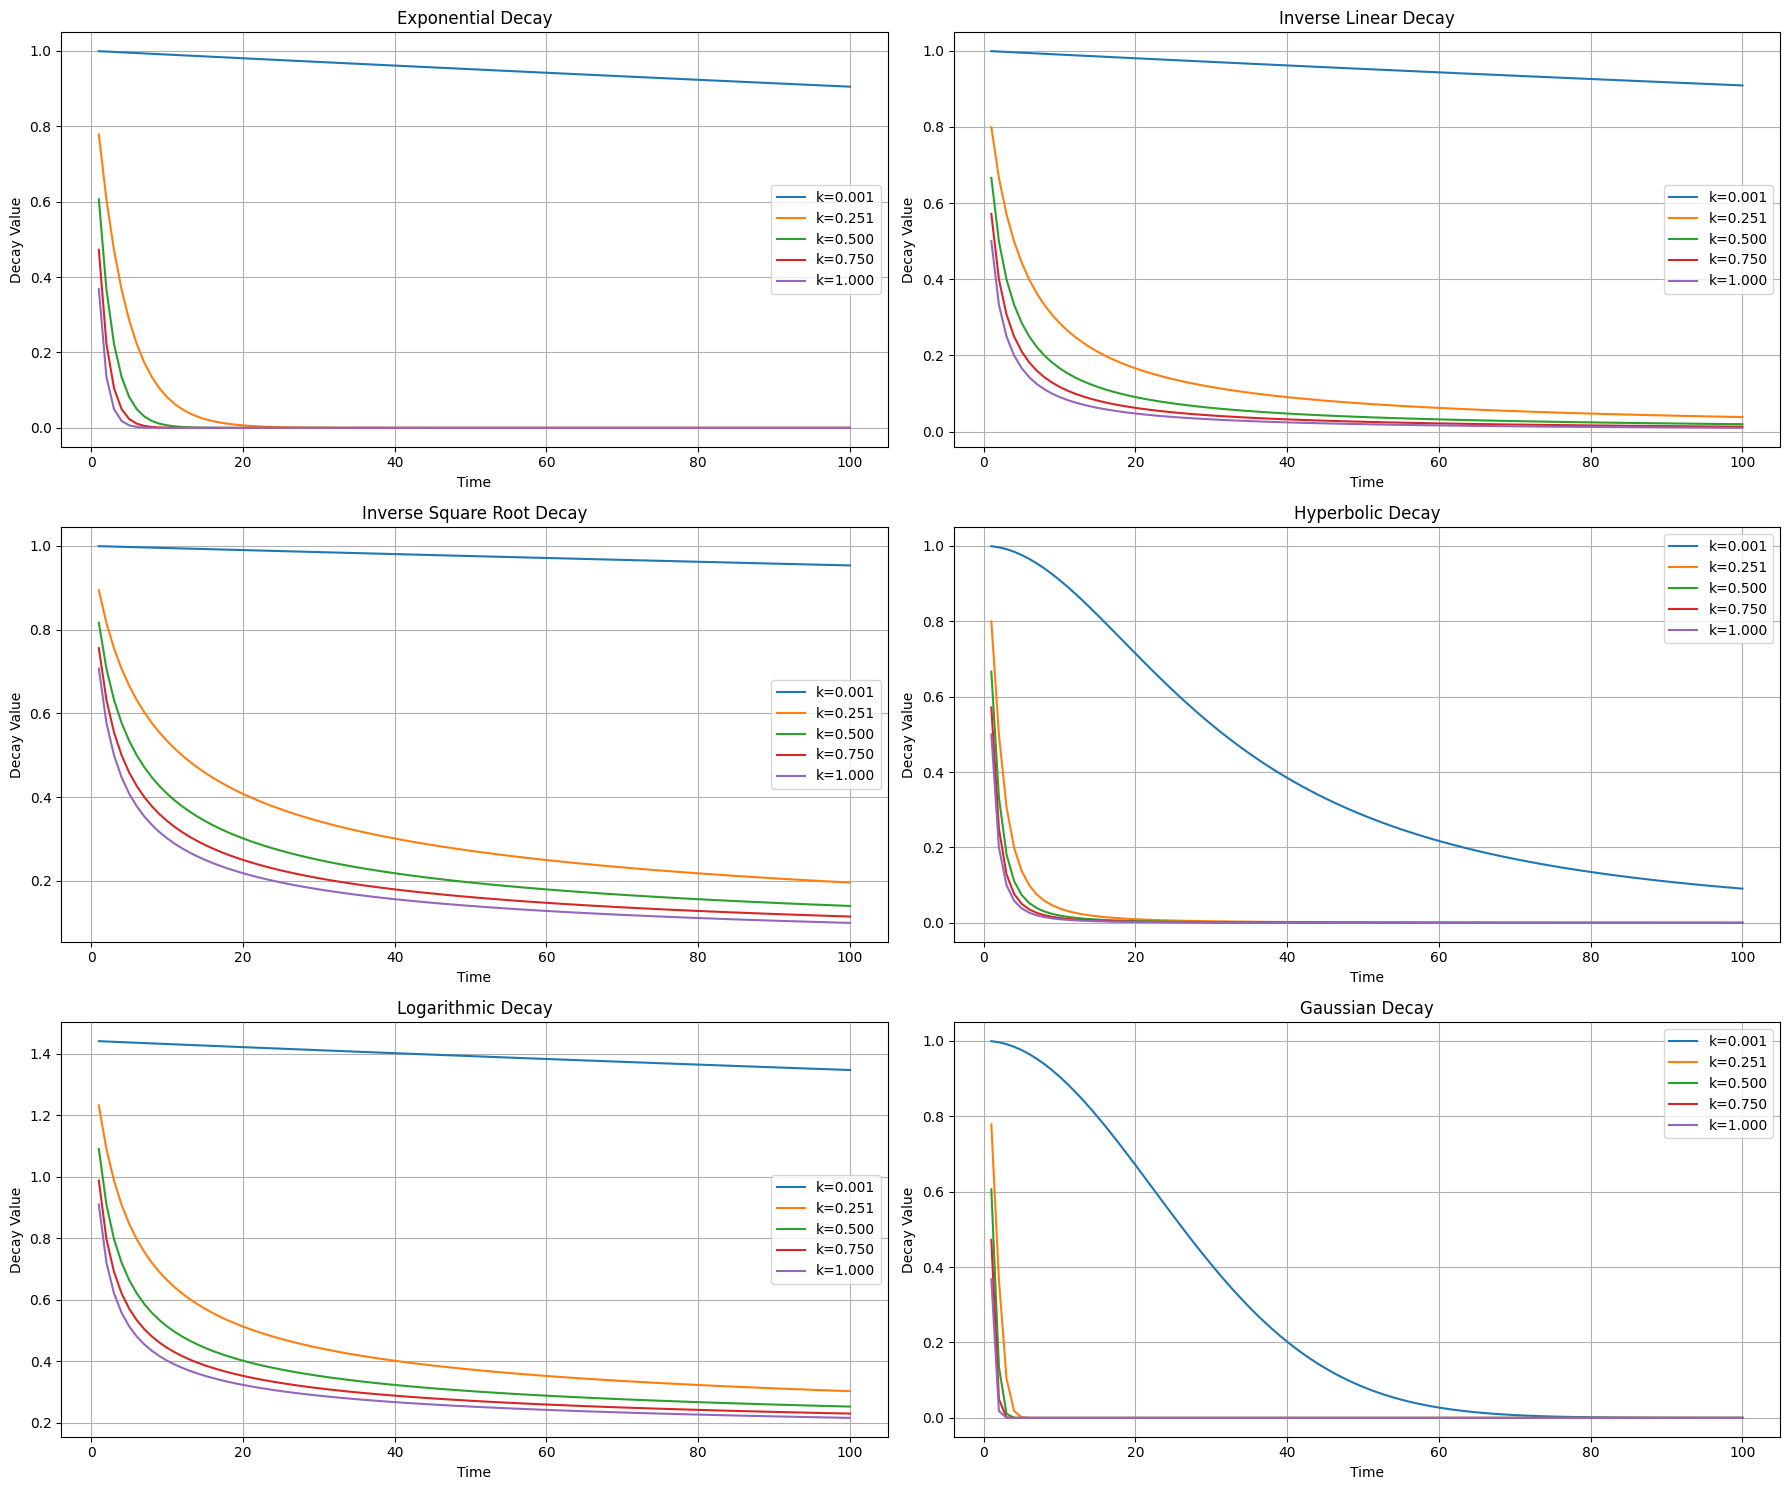

In [56]:
# Correcting the decay functions for proper plotting
k_values = np.linspace(0.001, 1, 5)
def exp_decay(timeline, k):
    a = np.arange(1, len(timeline) + 1)
    return np.exp(-k * a)

def inv_lin_decay(timeline, k):
    a = np.arange(1, len(timeline) + 1)
    return 1 / (1 + k * a)

def inv_sqrt_decay(timeline, k):
    a = np.arange(1, len(timeline) + 1)
    return 1 / np.sqrt(1 + k * a)

def hyper_decay(timeline, k):
    a = np.arange(1, len(timeline) + 1)
    return 1 / (1 + k * a**2)

def log_decay(timeline, k):
    a = np.arange(1, len(timeline) + 1)
    return 1 / np.log(1 + k * a + 1)

def gauss_decay(timeline, k):
    a = np.arange(1, len(timeline) + 1)
    return np.exp(-k * a**2)

# Plot each decay function
def plot_decay(ax, decay_func, title):
    for k in k_values:
        decay_values = decay_func(timeline, k)
        ax.plot(timeline, decay_values, label=f'k={k:.3f}')
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Decay Value')
    ax.legend()
    ax.grid(True)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(18, 15))
axs = axs.flatten()

plot_decay(axs[0], exp_decay, 'Exponential Decay')
plot_decay(axs[1], inv_lin_decay, 'Inverse Linear Decay')
plot_decay(axs[2], inv_sqrt_decay, 'Inverse Square Root Decay')
plot_decay(axs[3], hyper_decay, 'Hyperbolic Decay')
plot_decay(axs[4], log_decay, 'Logarithmic Decay')
plot_decay(axs[5], gauss_decay, 'Gaussian Decay')

plt.tight_layout()
plt.show()
